# Filtry konwolucyjne
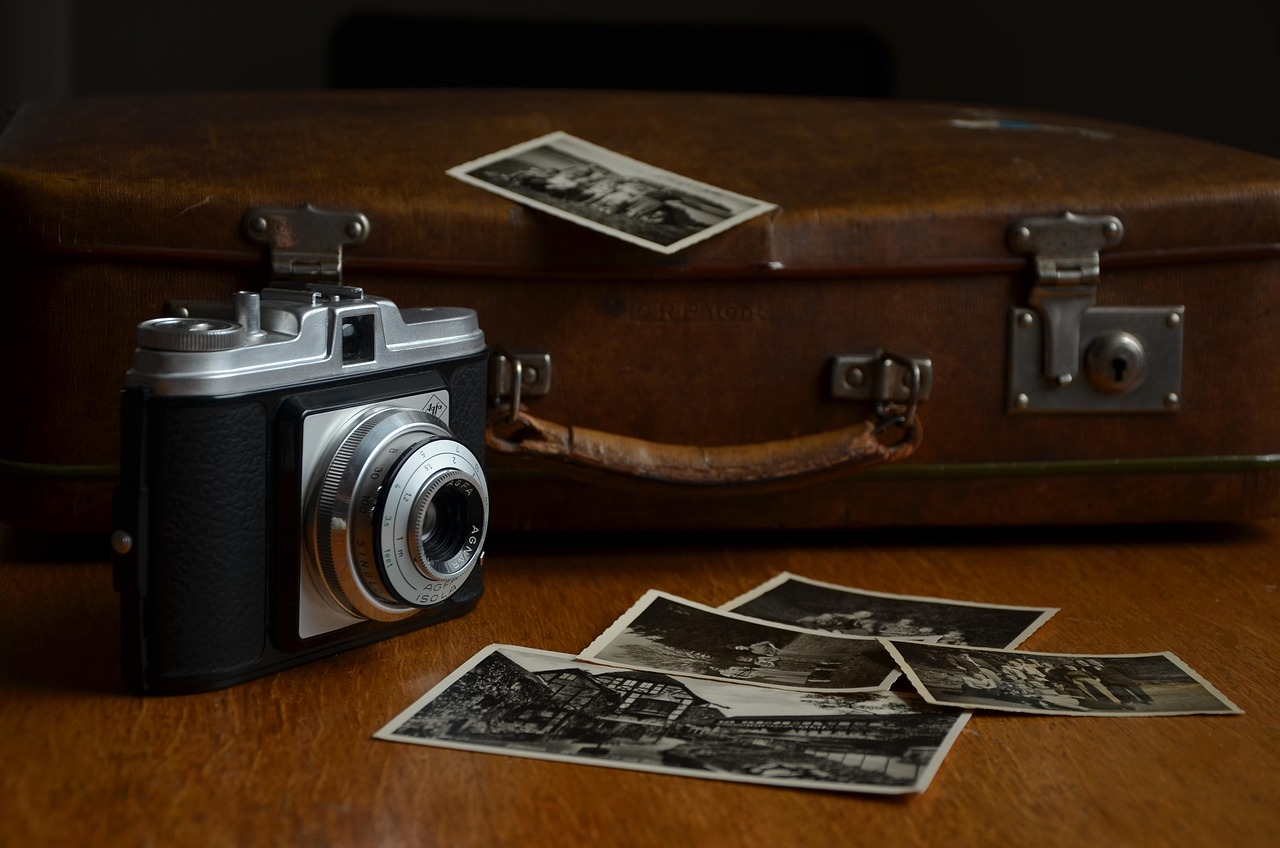

*Źródło: Pixabay*

## Wstęp
Wyobraź sobie, że znajdujesz na strychu stare, rodzinne fotografie. Niestety, upływ czasu sprawił, że zdjęcia są wyblakłe, zaszumione i nieostre. Chcesz je odrestaurować i przywrócić im dawną świetność. Możesz spędzić wiele godzin, ręcznie poprawiając je w programie graficznym, ale co, gdyby dało się stworzyć jeden, uniwersalny "magiczny filtr", który automatycznie naprawi każde zepsute zdjęcie?

W tym zadaniu Twoim celem jest właśnie stworzenie takiego "przepisu" na naprawę obrazów. Ten przepis, w świecie informatyki i sztucznej inteligencji, nazywa się **kernelem konwolucji**. To fundamentalne narzędzie w przetwarzaniu obrazów, które leży u podstaw tego, jak komputery "widzą" i rozumieją świat.

## Czym jest Konwolucja?

Zanim przejdziemy do zadania, musimy zrozumieć dwie rzeczy: czym jest obraz dla komputera i jak działa na nim "magiczny filtr", czyli konwolucja.

### Czym jest obraz dla komputera?
Dla nas obraz to twarz, krajobraz, czy kot. Dla komputera to po prostu **wielka siatka z liczbami**. Każda liczba w tej siatce odpowiada jasności jednego **piksela**. W obrazach kolorowych mamy trzy takie siatki – jedną dla koloru czerwonego (R), jedną dla zielonego (G) i jedną dla niebieskiego (B).

### Jak działa konwolucja?
Konwolucja to operacja, w której niewielka macierz liczb (np. o rozmiarze 3x3), zwana **kernelem**, jest przesuwana po całym obrazie, piksel po pikselu.

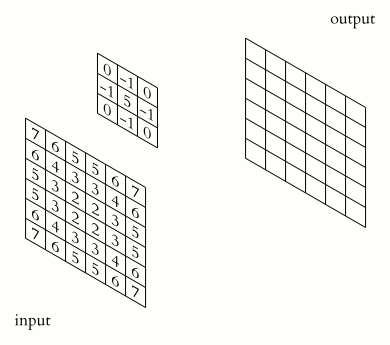

*Źródło: Michael Plotke, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons*

Dla każdego położenia kernela na obrazie, wykonujemy prostą operację:
1.  Bierzemy fragment obrazu znajdujący się pod kernelem i **mnożymy** odpowiadające sobie wartości pikseli i wag z kernela.
2.  **Sumujemy** wszystkie te wyniki.
3.  Wynik tej sumy staje się **nową wartością piksela** w nowym, przetworzonym obrazie.

W zależności od tego, jakie liczby wpiszemy do kernela, uzyskamy zupełnie inne efekty.

## Przykłady kerneli

| Kernel (Macierz 3x3) | Efekt na obrazie |
|:---:|:---:|
| **Identyczność**<br>Jedynka w środku sprawia, że nowy piksel jest idealną kopią oryginalnego.<br> $$\begin{bmatrix} 0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix}$$ | 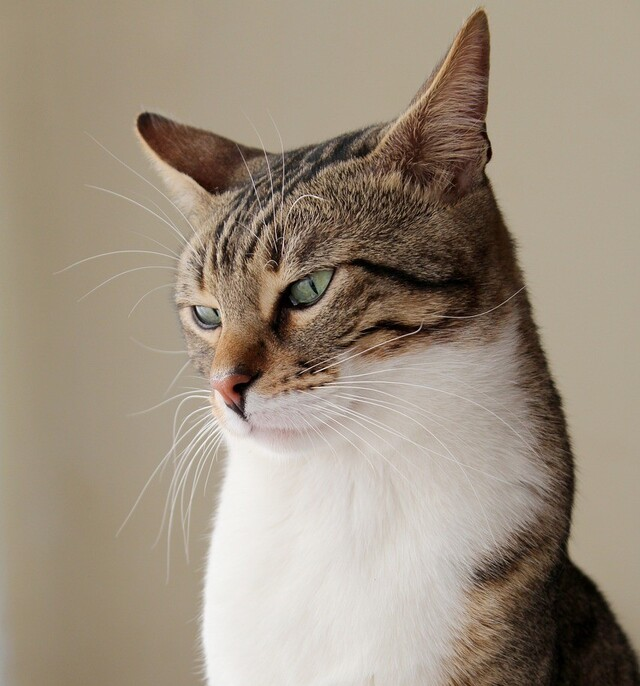 |
| **Rozmycie**<br>Uśrednia wartość piksela z jego sąsiadami, co wygładza obraz.<br> $$\begin{bmatrix} \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \end{bmatrix}$$ | 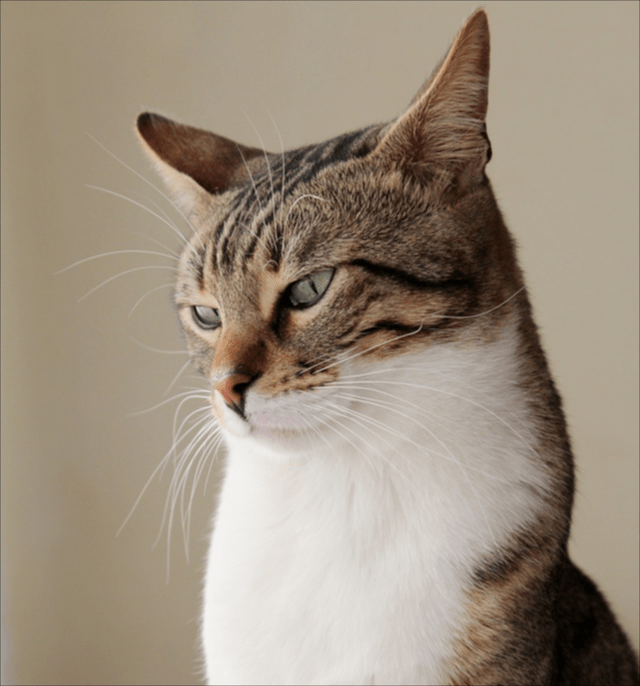 |
| **Wyostrzanie**<br>Podkreśla różnice między pikselem a jego otoczeniem, uwydatniając detale.<br> $$\begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0 \end{bmatrix}$$ | 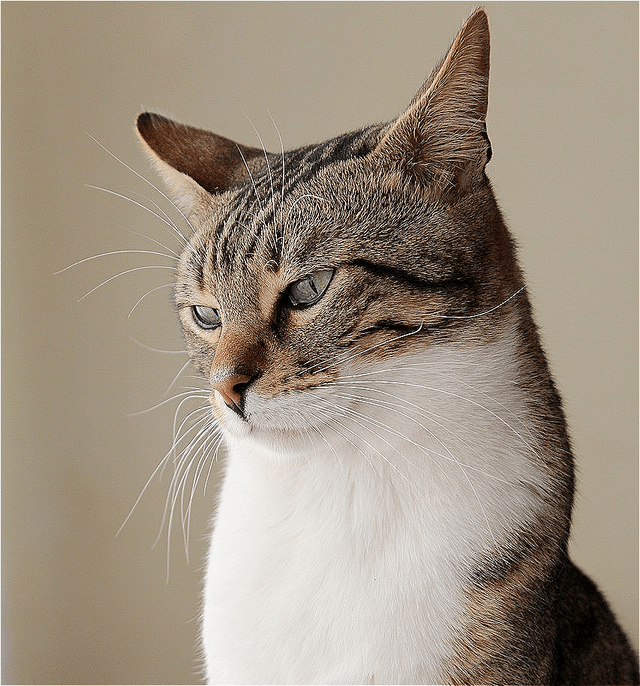 |
| **Wykrywanie krawędzi pionowych**<br>Wzmacnia miejsca, gdzie po lewej stronie są ciemne piksele, a po prawej jasne.<br> $$\begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}$$ | 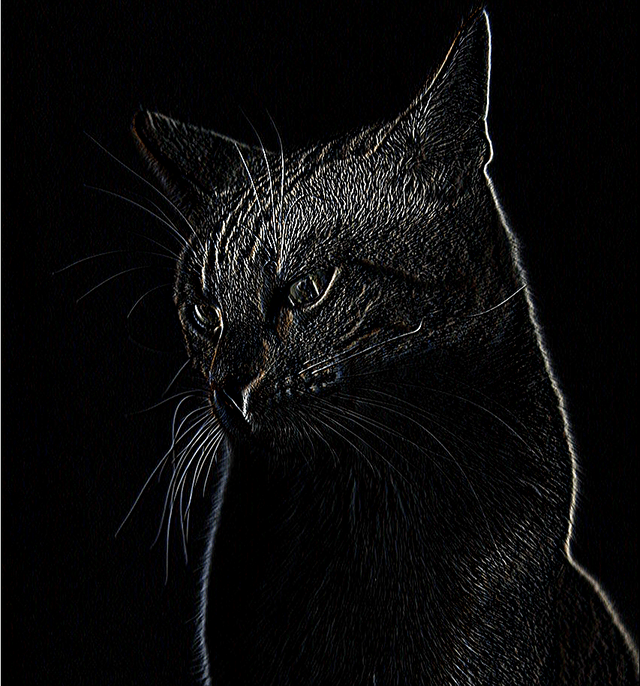 |


## A czym jest upsampling?

W drugiej części zadania spotkasz się z pojęciem **upsamplingu**, czyli **powiększania obrazu**.
To operacja odwrotna do zmniejszania (downsamplingu):
mamy mały obraz, np. 128x128 pikseli, i chcemy z niego uzyskać większy — np. 256x256.

Problem w tym, że komputer nie wie, jakie powinny być wartości nowych, „wymyślonych” pikseli.
Dlatego musi je jakoś **zgadnąć**.

Najprostszy sposób to wymyślić bardzo prostą regułę, na przykład taką (nazywaną **nearest neighbor upsampling**):

> Każdy piksel z małego obrazu po prostu **powielamy** w poziomie i pionie tyle razy, ile potrzeba, aby wypełnić większy blok pikseli.

W efekcie powiększony obraz wygląda jak powiększona „mozaika” — kształty są zachowane, ale widać wyraźnie ostre krawędzie i duże piksele.

## Zadanie

W tym zadaniu będziesz pracować nad dwiema powiązanymi częściami:

1.   Część pierwsza — Kernel konwolucyjny
2.   Część druga — Upsampling (powiększanie obrazów)

Każda z nich jest oceniana niezależnie.

### Część 1 — Kernel konwolucyjny

Twoim zadaniem jest znalezienie **jednego, uniwersalnego kernela (filtru)**,
który potrafi przywracać zepsute zdjęcia do formy jak najbardziej zbliżonej do oryginałów.

*Uwaga:* Rozmiar kernela nie powinien przekroczyć **10x10**.

Jako punkt wyjścia otrzymujesz funkcję `compute_kernel()`,
która zwraca prosty filtr — tzw. **kernel rozmywający** 9x9 (wyżej znajdziesz przykład pokazujący działanie takiego kernela w rozmiarze 3x3).

Zamiast ręcznego dobierania wag, możesz wykorzystać mechanizm `autograd` z biblioteki PyTorch. Służy on do automatycznej optymalizacji – w iteracyjnym procesie dopasuje wartości w kernelu tak, aby błąd rekonstrukcji obrazu był jak najmniejszy.

### Część 2 — Upsampling

W drugiej części skupisz się na problemie powiększania obrazów.

Tym razem Twoim zadaniem jest zaimplementowanie funkcji `upsample(image: torch.Tensor) -> torch.Tensor`,
która otrzymuje pomniejszony obraz (`(C, h, w)`) i ma go powiększyć do pełnego rozmiaru (`(C, H, W)`).

Punktem odniesienia (bazą) będzie bardzo prosta metoda,
**nearest neighbor**, która powiela każdy piksel odpowiednią liczbę razy w pionie i poziomie.

Oprócz funkcji `upsample` masz również możliwość dobrania **dodatkowego kernela** (wyliczanego przez funkcję `compute_kernel_upsampling(kernel_task1: torch.Tensor) -> torch.Tensor`), który zostanie zastosowany *po* upsamplingu, już na powiększonym obrazie. Domyślnie jest to kernel z pierwszej części zadania.

W tej części oceniana jest jakość rekonstrukcji obrazu po dwóch etapach:

1. **upsampling (funkcja `upsample()`)**,
2. **konwolucja z Twoim kernelem (funkcja `compute_kernel_upsampling(...)`)**.

## Dane

W tym zadaniu dostępne są dla Ciebie dwa zbiory danych zapisane w jednym pliku (`train_val.npz`):

*   `train_ds` — **150 przykładów treningowych**,
*   `val_ds` — **50 przykładów walidacyjnych**.

Każdy przykład to **trójka powiązanych obrazów**:


*   `image_original` – oryginalny, poprawny obraz w rozdzielczości **256x256 pikseli**,
*   `image_corrupted` – ten sam obraz po zniekształceniu, również **256x256**,
*   `image_corrupted_downsampled` – wersja `image_corrupted` pomniejszona do **128x128**,
na której będziesz testować swoje metody upsamplingu.

Wszystkie obrazy są kolorowe (RGB) i zapisane w formacie **tensorów PyTorch** o kształcie `(3, H, W)`
oraz wartościach znormalizowanych do zakresu **[0, 1]**.

## Kryterium Oceny
Obie części zadania zostaną ocenione na podstawie metryki **MSE (Mean Squared Error)**, czyli Błędu Średniokwadratowego. Jest to prosty sposób na zmierzenie, jak bardzo różnią się od siebie dwa obrazki. Metryka ta liczy różnicę między każdym pikselem w obrazie zrekonstruowanym a oryginalnym, podnosi te różnice do kwadratu i wyciąga z nich średnią.

**Im niższa wartość MSE, tym obrazki są do siebie bardziej podobne, a Twoje rozwiązanie jest lepsze.**

### Część 1 (70 pkt.) - Kernel konwolucyjny
- Za tę część możesz zdobyć maksymalnie 70 punktów.
- Gdy wartość MSE dla Twojego rozwiązania będzie wynosiła 0.0285 (lub więcej), otrzymasz 0 punktów za tę część zadania.
- Gdy wartość MSE dla Twojego rozwiązania będzie wynosiła 0.0077 (lub mniej), otrzymasz 70 punktów za tę część zadania.
- W przeciwnym wypadku, liczba punktów zostanie wyznaczona proporcjonalnie do wartości MSE:
$$
\text{score} \_ \text{kernel} = round(\frac{0.0285 - \text{MSE} \_ \text{kernel}}{0.0285 - 0.0077} \times 70)
$$

### Część 2 (30 pkt.) - Upsampling
- Za tę część możesz zdobyć maksymalnie 30 punktów.
- Gdy wartość MSE dla Twojego rozwiązania będzie wynosiła 0.0542 (lub więcej), otrzymasz 0 punktów za tę część zadania.
- Gdy wartość MSE dla Twojego rozwiązania będzie wynosiła 0.0350 (lub mniej), otrzymasz 30 punktów za tę część zadania.
- W przeciwnym wypadku, liczba punktów zostanie wyznaczona proporcjonalnie do wartości MSE:
$$
\text{score} \_ \text{upsampling} = round(\frac{0.0542 - \text{MSE} \_ \text{upsampling}}{0.0542 - 0.0350} \times 30)
$$

### Wynik końcowy

Końcowa punktacja to suma wyników z obu części:
$$
\text{Wynik końcowy} = \text{score} \_ \text{kernel} + \text{score} \_ \text{upsampling}
$$
czyli:
- **70% punktów** pochodzi z jakości Twojego kernela (funkcji `compute_kernel()`)
- **30% punktów** z jakości Twoich funkcji `upsample()` i `compute_kernel_upsampling()`.

## Ograniczenia
- Twoje rozwiązanie będzie testowane na Platformie Konkursowej bez dostępu do internetu oraz w środowisku z GPU.
- Ewaluacja Twojego finalnego rozwiązania na Platformie Konkursowej nie może trwać dłużej niż 3,5 minuty z GPU.
- Dozwolone biblioteki: `numpy`, `torch` (w rozwiązaniu **nie można** używać modułu `torch.nn`).

## Pliki Zgłoszeniowe
Ten notebook uzupełniony o Twoje rozwiązanie (funkcje `compute_kernel`, `compute_kernel_upsampling` i `upsample`).

## Ewaluacja
Pamiętaj, że podczas sprawdzania flaga `FINAL_EVALUATION_MODE` zostanie ustawiona na `True`.

Za to zadanie możesz zdobyć pomiędzy 0 a 100 punktów. Liczba punktów, którą zdobędziesz, będzie wyliczona na (tajnym) zbiorze testowym na Platformie Konkursowej na podstawie wyżej wspomnianego wzoru, zaokrąglona do liczby całkowitej. Jeśli Twoje rozwiązanie nie będzie spełniało powyższych kryteriów lub nie będzie wykonywać się prawidłowo, otrzymasz za zadanie 0 punktów.

## Kod Startowy
W tej sekcji inicjalizujemy środowisko poprzez zaimportowanie potrzebnych bibliotek i funkcji. Przygotowany kod ułatwi Tobie efektywne operowanie na danych i budowanie właściwego rozwiązania.

In [1]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

FINAL_EVALUATION_MODE = False  # Podczas sprawdzania ustawimy tę flagę na True.

In [ ]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

if not FINAL_EVALUATION_MODE:
    import matplotlib.pyplot as plt

import os
import torch
import numpy as np
import math
import shutil
from typing import Callable, Optional

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

seed = 12345

os.environ["PYTHONHASHSEED"] = str(seed)
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################
# Komórka zawierająca funkcje pomocnicze do przygotowania danych.

def download_data() -> None:
    """Pobiera zbiór danych z Google Drive i zapisuje go w folderze 'data'."""
    import gdown

    # Utwórz lub zresetuj folder 'data'
    if not os.path.exists('data'):
        os.makedirs('data')
    else:
        shutil.rmtree('data')
        os.makedirs('data')

    # Pobierz plik z Google Drive i zapisz go w folderze 'data'
    url = "https://drive.google.com/file/d/1wzYqBQ56IMXpM7_gv05vzercvZSZy-Ps/view?usp=drive_link"
    output = f'data/train_val.npz'
    gdown.download(url, output, quiet=True, fuzzy=True)

def setup_data_from_npz(npz_path: str) -> tuple[list[dict], list[dict]]:
    """
    Ładuje trójki obrazów (oryginalne, zepsute i zmniejszone (downsampled)
    zepsute) z pliku NPZ i zwraca je w postaci dwóch list słowników.

    Przyjmuje:
        npz_path (str): Ścieżka do pliku .npz z danymi.

    Zwraca:
        tuple[list[dict], list[dict]]:
            - train_ds: lista słowników {'image_original': tensor,
                'image_corrupted': tensor, 'image_corrupted_downsampled': tensor}
            - val_ds:   lista słowników w tym samym formacie, ale dla walidacji.
    """
    # Ładowanie danych z pliku
    data = np.load(npz_path, allow_pickle=True)
    train_list = data['train_ds'].tolist()
    val_list   = data['val_ds'].tolist()

    def to_tensor_triplet(sample: dict) -> dict:
        # Konwertujemy wczytane dane (uint8) na float32
        # i skalujemy je z powrotem do zakresu [0, 1] dzieląc przez 255.0
        return {
            "image_original": torch.from_numpy(sample["image_original"]).to(torch.float32) / 255.0,
            "image_corrupted": torch.from_numpy(sample["image_corrupted"]).to(torch.float32) / 255.0,
            "image_corrupted_downsampled": torch.from_numpy(sample["image_corrupted_downsampled"]).to(torch.float32) / 255.0,
        }

    train_ds = [to_tensor_triplet(s) for s in train_list]
    val_ds   = [to_tensor_triplet(s) for s in val_list]

    return train_ds, val_ds

In [ ]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################
# Komórka zawierająca funkcje pomocnicze do ewaluacji rozwiązania.

def _pad_replicate(x: torch.Tensor, pad: int) -> torch.Tensor:
    """
    „Dopełnienie przez powielanie” — dodaje ramkę z pikseli brzegowych obrazu.
    Przydaje się do operacji konwolucji (kernel w środku, brzeg nie „ucieka”).

    Przyjmuje:
        x (torch.Tensor): Obraz o kształcie (C, H, W).
        pad (int): Liczba pikseli do dodania po każdej stronie.

    Zwraca:
        torch.Tensor: Obraz o powiększonym rozmiarze (C, H+2*pad, W+2*pad).
    """
    if pad == 0:
        return x
    # Dopełnienie w pionie: duplikujemy pierwszy i ostatni wiersz.
    top    = x[:, :1, :].expand(-1, pad, -1)
    bottom = x[:, -1:, :].expand(-1, pad, -1)
    xvb = torch.cat([top, x, bottom], dim=1)          # (C, H+2p, W)
    # Dopełnienie w poziomie: duplikujemy pierwszą i ostatnią kolumnę.
    left  = xvb[:, :, :1].expand(-1, -1, pad)
    right = xvb[:, :, -1:].expand(-1, -1, pad)
    xpad = torch.cat([left, xvb, right], dim=2)       # (C, H+2p, W+2p)
    return xpad

def apply_kernel(image: torch.Tensor, kernel: torch.Tensor) -> torch.Tensor:
    """
    Zastosowanie tego samego filtra (kernela) do każdej składowej kanałowej obrazu.

    Przyjmuje:
        image (torch.Tensor): Obraz o kształcie (C, H, W) w zakresie [0,1].
        kernel (torch.Tensor): Filtr 2D o kształcie (K, K).

    Zwraca:
        torch.Tensor: Nowy obraz (C, H, W) po zastosowaniu kernela.
    """
    assert image.dim() == 3, "image musi mieć wymiary (C,H,W)"
    assert kernel.dim() == 2 and kernel.size(0) == kernel.size(1), "kernel musi być kwadratem (K,K)"
    assert kernel.size(0) <= 10, "rozmiar kernela nie może przekraczać 10x10"
    C, H, W = image.shape
    K = kernel.size(0)
    pad = K // 2

    # Dopełnienie replikacją (bez modyfikacji w miejscu — ważne dla autograd).
    xpad = _pad_replicate(image, pad)                 # (C, H+2p, W+2p)

    # Tworzymy „okienka” z sąsiednich pikseli dla każdego miejsca w obrazie: (C, H, W, K, K)
    sC, sH, sW = xpad.stride()
    windows = xpad.as_strided(
        size=(C, H, W, K, K),
        stride=(sC, sH, sW, sH, sW)
    )

    # Obliczamy korelację: mnożenie element po elemencie i sumowanie po sąsiedztwie KxK
    out = (windows * kernel.view(1, 1, 1, K, K)).sum(dim=(-1, -2))   # (C,H,W)
    return out

def evaluate_solution(
    kernel: torch.Tensor,
    ds: list[dict],
    upsample_fun: Optional[Callable] = None
) -> float:
    """
    Oblicza średni błąd MSE (Mean Squared Error) na podanym zbiorze danych.

    Przyjmuje:
        kernel (torch.Tensor): Filtr 2D (np. 5x5), który ma zostać oceniony.
        ds (list[dict]): Lista próbek z kluczami 'image_original',
            'image_corrupted' i 'image_corrupted_downsampled'.
        upsample_fun (Optional[Callable]): (Opcjonalnie) Funkcja do upsamplingu
            (torch.Tensor -> torch.Tensor), która ma zostać oceniona.

    Zwraca:
        float: Średnia wartość błędu MSE dla całego zbioru.
    """
    total_mse = 0.0
    kernel = kernel.to(DEVICE)

    # Nie potrzebujemy gradientów podczas ewaluacji — przyspiesza i oszczędza pamięć.
    with torch.no_grad():
        for sample in ds:
            original = sample['image_original'].to(DEVICE)

            # Wybór właściwej wersji "corrupted":
            # - jeśli podano funkcję upsamplingu, powiększamy wersję zmniejszoną,
            # - w przeciwnym razie bierzemy wersję w pełnym rozmiarze.
            if upsample_fun is not None:
                corrupted = sample['image_corrupted_downsampled'].to(DEVICE)
                corrupted = upsample_fun(corrupted)  # oczekujemy (C, H, W)
            else:
                corrupted = sample['image_corrupted'].to(DEVICE)  # już (C, H, W)

            # Rekonstrukcja obrazu przez zastosowanie kernela do „zepsutego” obrazu.
            reconstructed = apply_kernel(corrupted, kernel)
            # MSE: średnia z kwadratów różnic piksel po pikselu.
            mse = torch.mean((reconstructed - original)**2)
            total_mse += mse.item()

    return total_mse / len(ds)

def round_half_up(number: float) -> int:
    """
    Zaokrąglanie do najbliższej liczby całkowitej (.5 zawsze w górę).
    """
    return int(math.floor(number + 0.5))

def compute_score(kernel_mse: float, upsampling_mse: float) -> tuple[int, int, int]:
    """
    Przelicza dwa wyniki MSE (dla kernela i dla upsamplingu) na jedną ocenę 0–100.
    Każdy MSE jest osobno mapowany do skali punktowej na podstawie progów,
    a następnie łączony wagami.

    Przyjmuje:
        kernel_mse (float): Średni błąd MSE dla części 1 (kernel).
        upsampling_mse (float): Średni błąd MSE dla części 2 (upsampling).

    Zwraca:
        tuple[int, int, int]: Krotka zawierająca końcowy wynik (0–100),
            wynik za część 1 (kernel) i wynik za część 2 (upsampling).
    """

    # Progi jakości: im mniejsze MSE, tym lepiej.
    # 100 pkt dostaje się przy MSE <= lower_bound,
    # 0 pkt przy MSE >= upper_bound,
    # w przeciwnym razie — między 100 a 0 (wynik skalowany liniowo).

    KERNEL_LOWER = 0.0077
    KERNEL_UPPER = 0.0285
    UPS_LOWER    = 0.0350
    UPS_UPPER    = 0.0542

    # Wagi części zadania.
    KERNEL_W = 0.7
    UPS_W    = 0.3

    def linear_score(mse: float, lower: float, upper: float) -> float:
        """
        Mapuje MSE na przedział [0,100] wg progów.
        - mse <= lower  -> 100
        - mse >= upper  -> 0
        - w środku      -> liniowo między 100 a 0
        """
        if mse <= lower:
            return 100.0
        if mse >= upper:
            return 0.0
        # im bliżej lower, tym więcej punktów
        return 100.0 * (upper - mse) / (upper - lower)

    kernel_score = round_half_up(KERNEL_W * linear_score(kernel_mse, KERNEL_LOWER, KERNEL_UPPER))
    upsampling_score = round_half_up(UPS_W * linear_score(upsampling_mse, UPS_LOWER, UPS_UPPER))

    # Łączymy punktację i przycinamy do [0,100] na wszelki wypadek.
    final_score = kernel_score + upsampling_score
    final_score = max(0, min(100, final_score))

    return final_score, kernel_score, upsampling_score

In [ ]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################
# Komórka zawierająca funkcje pomocnicze do wizualizacji.

def plot_results(
    original: torch.Tensor,
    corrupted: torch.Tensor,
    reconstructed: torch.Tensor,
    title: str = "Wyniki rekonstrukcji",
    labels: tuple = ("Oryginał", "Zepsuty", "Zrekonstruowany"),
    center_smaller: bool = True,
    background: float = 1.0,
    show_shapes: bool = True,
    clip_for_display: bool = True
) -> None:
    """
    Wyświetla trzy obrazy obok siebie. Jeśli któryś obraz ma mniejszy rozmiar
    niż największy z pozostałych i `center_smaller=True`, jest tylko
    **wyśrodkowany** na płótnie o rozmiarze największego obrazu (za pomocą
    wypełnienia kolorem tła), aby rozmiary paneli były spójne wizualnie.

    Przyjmuje:
        original (torch.Tensor): Obraz wzorcowy w formacie (C, H, W), wartości w [0, 1].
        corrupted (torch.Tensor): Obraz „zepsuty” w formacie (C, h, w); może być mniejszy.
        reconstructed (torch.Tensor): Obraz po rekonstrukcji w formacie (C, H, W).
        title (str): Tytuł całej figury.
        labels (tuple): Podpisy nad panelami (od lewej): ("Oryginał", "Zepsuty", "Zrekonstruowany").
        center_smaller (bool): Gdy True, mniejsze obrazy są wyśrodkowane paddingiem (bez skalowania).
        background (float): Kolor tła (paddingu) w [0, 1]; 1.0 = białe, 0.0 = czarne.
        show_shapes (bool): Gdy True, rozmiary (wysokość×szerokość) dopisywane są do tytułów paneli.
        clip_for_display (bool): Gdy True, klipuje tylko kopię danych do [0,1]
            na potrzeby imshow (eliminuje warningi i „przepalenia” na ekranie).

    Zwraca:
        None
    """
    import numpy as np

    def to_hwc_np(t: torch.Tensor) -> np.ndarray:
        """
        Konwertuje tensor (C, H, W) na tablicę NumPy (H, W, C) w [0, 1],
        bez modyfikowania wartości.
        """
        return t.detach().cpu().permute(1, 2, 0).numpy()

    def pad_center(img_hwc: np.ndarray, target_hw: tuple, bg: float) -> np.ndarray:
        """
        Wkleja obraz (H, W, C) na środek płótna o rozmiarze target_hw (H_t, W_t).

        Przyjmuje:
            img_hwc (np.ndarray): Obraz wejściowy (H, W, C) w [0, 1].
            target_hw (tuple[int,int]): Docelowy rozmiar płótna (H_t, W_t).
            bg (float): Kolor tła w [0, 1].

        Zwraca:
            np.ndarray: Obraz (H_t, W_t, C) z obrazem wejściowym wyśrodkowanym.
        """
        Ht, Wt = target_hw
        h, w, c = img_hwc.shape
        # Jeśli rozmiary już się zgadzają albo nie chcemy centrować, zwracamy bez zmian
        if (h, w) == (Ht, Wt) or not center_smaller:
            return img_hwc

        # Tworzymy płótno tła i wklejamy obraz pośrodku
        canvas = np.full((Ht, Wt, c), bg, dtype=img_hwc.dtype)
        top = (Ht - h) // 2
        left = (Wt - w) // 2
        canvas[top:top + h, left:left + w, :] = img_hwc
        return canvas

    # Konwersja do HWC numpy
    img_o = to_hwc_np(original)
    img_c = to_hwc_np(corrupted)
    img_r = to_hwc_np(reconstructed)

    # Wspólna ramka = maksymalny rozmiar spośród wejść
    Hs = [img_o.shape[0], img_c.shape[0], img_r.shape[0]]
    Ws = [img_o.shape[1], img_c.shape[1], img_r.shape[1]]
    target_hw = (max(Hs), max(Ws))

    # Padding tylko jeśli potrzeba
    img_o_pad = pad_center(img_o, target_hw, background)
    img_c_pad = pad_center(img_c, target_hw, background)
    img_r_pad = pad_center(img_r, target_hw, background)

    # Opcjonalnie dopisz rozmiary do tytułów
    titles = list(labels)
    if show_shapes:
        titles[0] = f"{titles[0]} ({img_o.shape[0]}×{img_o.shape[1]})"
        titles[1] = f"{titles[1]} ({img_c.shape[0]}×{img_c.shape[1]})"
        titles[2] = f"{titles[2]} ({img_r.shape[0]}×{img_r.shape[1]})"

    # Opcjonalny klip tylko do wyświetlania
    if clip_for_display:
        def clip01(a: np.ndarray) -> np.ndarray:
            return np.clip(a, 0.0, 1.0, out=a.copy())
        show_o = clip01(img_o_pad)
        show_c = clip01(img_c_pad)
        show_r = clip01(img_r_pad)
    else:
        show_o, show_c, show_r = img_o_pad, img_c_pad, img_r_pad

    # Rysowanie
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for ax, img, lab in zip(axes, (show_o, show_c, show_r), titles):
        ax.imshow(img, origin="upper")
        ax.set_title(lab)
        ax.axis("off")

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

## Ładowanie Danych
Za pomocą poniższego kodu dane zostaną pobrane i odpowiednio przygotowane.

In [ ]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

if not FINAL_EVALUATION_MODE:
    download_data()

    # Ścieżka do jednego pliku NPZ z danymi (treningowe + walidacyjne)
    NPZ_PATH = os.path.join('data', 'train_val.npz')

    # Wczytaj zbiory z NPZ
    train_ds, val_ds = setup_data_from_npz(NPZ_PATH) # Zmienne te będą dostępne również podczas finalnej ewaluacji

    if train_ds is not None and val_ds is not None:
        print(f"Ilość obrazów w zbiorze treningowym: {len(train_ds)}")
        print(f"Ilość obrazów w zbiorze walidacyjnym: {len(val_ds)}")

        # Podgląd przykładowych danych
        sample_for_show = val_ds[0]
        plot_results(sample_for_show['image_original'], sample_for_show['image_corrupted'], sample_for_show['image_corrupted_downsampled'], title="Przykładowe dane z pliku NPZ", labels=("Oryginał", "Zepsuty", "Zepsuty (downsampled)"))

## Twoje Rozwiązanie
Poniżej przedstawiamy uproszczone rozwiązania, które służą jako przykład.  Rozwiązania te uzyskują bardzo słabe wyniki, ale demonstrują, jakiego formatu odpowiedzi oczekujemy i mogą posłużyć jako punkt wyjścia do Twojej implementacji.

W tej sekcji należy umieścić Twoje rozwiązanie. Zmiany wprowadzaj wyłącznie tutaj. Do ewaluacji przekazane zostaną funkcje:
- `compute_kernel() -> torch.Tensor`,
- `upsample(image: torch.Tensor) -> torch.Tensor`,
- `compute_kernel_upsampling(kernel_task1: torch.Tensor) -> torch.Tensor`

Możesz w ich kontekście wywoływać dodatkowe funkcje pomocnicze.

Przygotowane wcześniej dane treningowe i walidacyjne są dostępne w zmiennych `train_ds`, `val_ds`.

### Część 1 - Kernel konwolucyjny

In [ ]:
def compute_kernel() -> torch.Tensor:
    """
    Tworzy kernel rozmywający o rozmiarze 9x9.
    """
    kernel = torch.ones(9, 9, device=DEVICE) / 81
    return kernel

### Część 2 - Upsampling

In [ ]:
def upsample(image: torch.Tensor) -> torch.Tensor:
    """
    Prosty upsampling metodą „najbliższego sąsiada” (nearest neighbor)
    do rozmiaru 256x256.

    Idea:
    Każdy piksel z mniejszego obrazu zostaje po prostu powielony kilka razy
    w pionie i poziomie. Dzięki temu obraz robi się większy, ale nie pojawiają
    się nowe szczegóły – widzimy tylko „rozciągnięte” oryginalne piksele.

    Przyjmuje:
        image (torch.Tensor): Obraz w formacie (C, h, w), gdzie:
            - C to liczba kanałów (np. 3 dla RGB),
            - h, w to wysokość i szerokość obrazu (≤ 256).

    Zwraca:
        torch.Tensor: Obraz o kształcie (C, 256, 256) otrzymany przez
        powtórzenie wierszy i kolumn wejścia tyle razy, żeby pokryć
        cały docelowy rozmiar, a następnie przycięcie do dokładnych
        wymiarów 256x256.
    """
    assert image.dim() == 3, "Oczekuję tensora o kształcie (C, h, w)."
    C, h, w = image.shape

    # Docelowe wymiary.
    Ht, Wt = (256, 256)

    # Ile razy musimy powtórzyć wiersze i kolumny, żeby dojść do >= 256.
    rh = max(1, math.ceil(Ht / h))
    rw = max(1, math.ceil(Wt / w))

    # repeat_interleave powiela kolejne wiersze/kolumny odpowiednią liczbę razy.
    y = image.repeat_interleave(rh, dim=1).repeat_interleave(rw, dim=2)

    # Może się zdarzyć, że powtórzeń jest „za dużo” – wtedy przycinamy do 256x256.
    return y[:, :Ht, :Wt]

In [ ]:
def compute_kernel_upsampling(kernel_task1: torch.Tensor) -> torch.Tensor:
    """
    W trakcie ewaluacji kernel z części pierwszej zostanie przekazany
    jako argument. Możesz go użyć lub zignorować.
    """
    return kernel_task1

## Ewaluacja

Uruchomienie poniższej komórki pozwoli sprawdzić, ile punktów zdobyłoby Twoje rozwiązanie na danych walidacyjnych.

Upewnij się przed wysłaniem, że cały notebook wykonuje się od początku do końca bez błędów i bez ingerencji użytkownika po wykonaniu polecenia `Run All`.

In [ ]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

if not FINAL_EVALUATION_MODE:

    # ============== 1) Pierwsza część zadania ==============
    # -- Trening
    your_kernel = compute_kernel()
    # -- Ewaluacja rozwiązania
    your_kernel_mse = evaluate_solution(your_kernel, val_ds)

    # ============== 2) Druga część zadania ==============
    # -- Trening
    your_kernel_upsampling = compute_kernel_upsampling(your_kernel)
    # -- Ewaluacja rozwiązania
    your_upsampling_mse = evaluate_solution(your_kernel_upsampling, val_ds, upsample)

    score, kernel_score, upsampling_score = compute_score(your_kernel_mse, your_upsampling_mse)

    print(f"MSE na zbiorze walidacyjnym (kernel): {your_kernel_mse:.4f}. Liczba punktów (kernel): {kernel_score}")
    print(f"MSE na zbiorze walidacyjnym (upsampling): {your_upsampling_mse:.4f}. Liczba punktów (upsampling): {upsampling_score}")
    print(f"Estymowana liczba punktów za zadanie: {score}")

    # Wizualizacja działania kernela na pojedynczym obrazie walidacyjnym.
    sample_for_show = val_ds[0]
    reconstructed = apply_kernel(sample_for_show['image_corrupted'].to(DEVICE), your_kernel.to(DEVICE))
    plot_results(sample_for_show['image_original'], sample_for_show['image_corrupted'], reconstructed, title="Wizualizacja działania twojego kernela")

    # Podgląd samego kernela (mapa kolorów).
    plt.figure(figsize=(5, 5))
    plt.imshow(your_kernel.cpu().detach().numpy(), cmap='viridis')
    plt.colorbar()
    plt.title("Twój kernel")
    plt.show()

    # Wizualizacja działania upsamplingu z kernelem na pojedynczym obrazie walidacyjnym.
    reconstructed = apply_kernel(upsample(sample_for_show['image_corrupted_downsampled'].to(DEVICE)), your_kernel_upsampling)
    plot_results(sample_for_show['image_original'], sample_for_show['image_corrupted_downsampled'], reconstructed, title="Wizualizacja działania twojej metody upsamplingu z kernelem", labels=("Oryginał", "Zepsuty (downsampled)", "Zrekonstruowany"))